# Step 1 : Set up of the environment

In [1]:
# Global parameters for the project
DATA_DIRECTORY = "data"

In [2]:
""" Librairies import """

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

Source of the Jupyter Notebook:
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

# Step 2 : EDA : Exploratory Data Analysis

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

In [3]:
# List files available
print(os.listdir(DATA_DIRECTORY))

['HomeCredit_columns_description.csv', 'sample_submission.csv', 'application_test.csv', 'installments_payments.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'POS_CASH_balance.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv']


In [4]:
# Training data
app_train = pd.read_csv(DATA_DIRECTORY + '/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv(DATA_DIRECTORY + '/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(app_train.shape)
print(app_train['SK_ID_CURR'].nunique())

(307511, 122)
307511


In [7]:
df = app_train.append(app_test)

In [8]:
df.shape

(356255, 122)

In [9]:
df['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

In [10]:
df['TARGET'].isna().sum()

48744

## Step 2.a : Focus on specific columns for loan simulation tool
For this exercice, I will attempt to create a loan simulation tool, available for everyone who would like to have insights on the bank confidence level to grant a loan.

I am aware that the resulting model will be less accurate compared to another one which would take into account all available data.

In [11]:
# Selection is based on "HomeCredit_columns_description.csv" file.
selected_columns = [
    'SK_ID_CURR', # to remove for modelization
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'OWN_CAR_AGE',
    'OCCUPATION_TYPE',
    'CNT_FAM_MEMBERS',
    'ORGANIZATION_TYPE',
    'DAYS_LAST_PHONE_CHANGE',
]

In [12]:
reduce_df = df[selected_columns]
print('Number of columns selected: ', reduce_df.shape[1])

Number of columns selected:  22


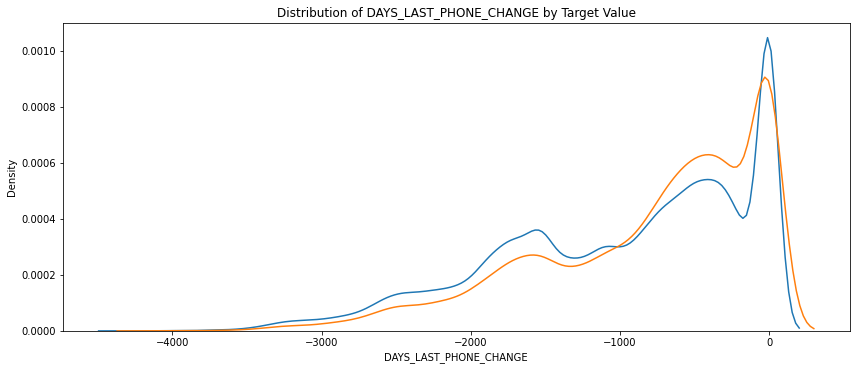

In [14]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['DAYS_LAST_PHONE_CHANGE']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(reduce_df.loc[reduce_df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(reduce_df.loc[reduce_df['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [ ]:
stop

## Step 2.b : EDA Exploratory Data Analysis & Data cleansing 

In [ ]:
reduce_df.dtypes

### Step 2.b.1 : Target Column 

In [ ]:
reduce_df['TARGET'].value_counts()

In [ ]:
reduce_df.groupby('TARGET').size().plot(kind='pie')

### Step 2.b.2 : Missing values

In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(reduce_df)
missing_values

### Step 2.b.3 : Categorical variables 

In [ ]:
# Number of unique classes in each object column
reduce_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

In [ ]:
for col in reduce_df:
    if reduce_df[col].dtype == 'object':
        print(col, " :\n", reduce_df[col].value_counts())

In [ ]:
def Categorical_Columns_Cleaning(df):
    """ Categorical Columns Cleaning """
    ### Non-representative values to nan ###
    df['CODE_GENDER'].replace('XNA', np.nan, inplace= True)
    df['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace= True)
    
    ### Clean Organization Type Column ###
    # Cleaning for Occupation Type ==> Removing Type + number associated, too complicated
    df['ORGANIZATION_TYPE'] = [x.split(':')[0] for x in df['ORGANIZATION_TYPE']]
    df['ORGANIZATION_TYPE'] = [x.split(' Type')[0] for x in df['ORGANIZATION_TYPE']]
    df['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace= True)
    print("ORGANIZATION_TYPE")
    print(df['ORGANIZATION_TYPE'].nunique())
    print(df['ORGANIZATION_TYPE'].unique().tolist())
    
    return df

In [ ]:
clean_df = Categorical_Columns_Cleaning(reduce_df)

### Step 2.b.4 : Numeric variables

In [ ]:
for col in clean_df.select_dtypes(include=[np.number]):
      print(col, " : ", "[", clean_df[col].min(), ', ', clean_df[col].max(), ']')

In [ ]:
for col in clean_df.select_dtypes(include=np.number):
    plt.figure(col)
    sns.violinplot(x=clean_df[col])

#### CNT_CHILDREN

In [ ]:
clean_df['CNT_CHILDREN'].value_counts()

In [ ]:
### CNT_CHILDREN to categorical ==> 3 & + children ###
category = pd.cut(clean_df.CNT_CHILDREN, bins=[0,1,2,3,99], labels=["0","1","2","3+"], right=False)
clean_df['CNT_CHILDREN'] = category
clean_df['CNT_CHILDREN'] = clean_df['CNT_CHILDREN'].astype('object')
print("CNT_CHILDREN: ")
clean_df['CNT_CHILDREN'].value_counts()

#### CNT_FAM_MEMBERS

In [ ]:
clean_df['CNT_FAM_MEMBERS'].value_counts()

In [ ]:
### CNT_FAM_MEMBERS to categorical ==> 5 & + family members ###
category = pd.cut(clean_df.CNT_FAM_MEMBERS, bins=[0,1,2,3,4,5,99], labels=["0","1","2","3","4","5+"], right=False)
clean_df['CNT_FAM_MEMBERS'] = category
clean_df['CNT_FAM_MEMBERS'] = clean_df['CNT_FAM_MEMBERS'].astype('object')
print("CNT_FAM_MEMBERS: ")
clean_df['CNT_FAM_MEMBERS'].value_counts()

#### DAYS_BIRTH

In [ ]:
clean_df['DAYS_BIRTH'].describe()

In [ ]:
(clean_df['DAYS_BIRTH'] / -365).describe()

In [ ]:
clean_df['YEARS_BIRTH'] = round(clean_df['DAYS_BIRTH'] / -365)
clean_df.drop(columns=['DAYS_BIRTH'], inplace=True)

In [ ]:
clean_df['YEARS_BIRTH'].describe()

In [ ]:
clean_df['YEARS_BIRTH'].isna().sum()

#### DAYS_EMPLOYED

In [ ]:
(clean_df['DAYS_EMPLOYED'] / -365).describe()

In [ ]:
clean_df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
# Replace the anomalous values with nan
clean_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

clean_df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
clean_df['YEARS_EMPLOYED'] = round(clean_df['DAYS_EMPLOYED'] / -365)
clean_df.drop(columns=['DAYS_EMPLOYED'], inplace=True)

In [ ]:
clean_df['YEARS_EMPLOYED'].describe()

In [ ]:
clean_df['YEARS_EMPLOYED'].isna().sum()

#### DAYS_LAST_PHONE_CHANGE

In [ ]:
clean_df['DAYS_LAST_PHONE_CHANGE'].describe()

In [ ]:
(clean_df['DAYS_LAST_PHONE_CHANGE'] / -365).describe()

In [ ]:
clean_df['YEARS_LAST_PHONE_CHANGE'] = clean_df['DAYS_LAST_PHONE_CHANGE'] / -365
clean_df.drop(columns=['DAYS_LAST_PHONE_CHANGE'], inplace=True)
clean_df['YEARS_LAST_PHONE_CHANGE'].plot.hist(title = 'YEARS_LAST_PHONE_CHANGE Histogram');
plt.xlabel('YEARS_LAST_PHONE_CHANGE');

In [ ]:
### CNT_FAM_MEMBERS to categorical ==> 5 & + family members ###
category = pd.cut(clean_df.YEARS_LAST_PHONE_CHANGE, bins=[0,0.5,1,2,3,4,5,99], labels=["New","6 months","1 year","2 years", "3 years","4 years", "5+ years"], right=False)
clean_df['YEARS_LAST_PHONE_CHANGE'] = category
clean_df['YEARS_LAST_PHONE_CHANGE'] = clean_df['YEARS_LAST_PHONE_CHANGE'].astype('object')
print("YEARS_LAST_PHONE_CHANGE: ")
clean_df['YEARS_LAST_PHONE_CHANGE'].value_counts()

#### OWN_CAR_AGE

In [ ]:
clean_df['OWN_CAR_AGE'].describe()

In [ ]:
clean_df['OWN_CAR_AGE'].plot.hist(title = 'OWN_CAR_AGE Histogram');
plt.xlabel('OWN_CAR_AGE');

In [ ]:
### CNT_FAM_MEMBERS to categorical ==> 5 & + family members ###
category = pd.cut(clean_df.OWN_CAR_AGE, bins=[0,1,2,3,5,10,20,60, 99],
                  labels=["New","1 year","2 years", "Less than 5 years","Less than 10 years",
                          "Less than 20 years", "More than 20 years", "Collection car"], right=False)
clean_df['OWN_CAR_AGE'] = category
clean_df['OWN_CAR_AGE'] = clean_df['OWN_CAR_AGE'].astype('object')
print("OWN_CAR_AGE: ")
clean_df['OWN_CAR_AGE'].value_counts()

### Step 2.b.5 : Encoding Categorical Variables

In [ ]:
clean_df.shape

In [ ]:
clean_df.dtypes

In [ ]:
# one-hot encoding of categorical variables
clean_df = pd.get_dummies(clean_df)

print('Features shape: ', clean_df.shape)

In [ ]:
clean_df.columns.tolist()

## Step 2.c : Feature Engineering 

#### Feature Engineering

Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on [gradient boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. [This is a great article on the subject)](https://www.featurelabs.com/blog/secret-to-data-science-success/). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering." 

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some [automated tools](https://docs.featuretools.com/getting_started/install.html) to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods: 

* Polynomial features
* Domain knowledge features

### Step 2.c.1 : Polynomial Features

#### Polynomial Features

One simple feature construction method is called [polynomial features](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables `EXT_SOURCE_1^2` and `EXT_SOURCE_2^2` and also variables such as `EXT_SOURCE_1` x `EXT_SOURCE_2`, `EXT_SOURCE_1` x `EXT_SOURCE_2^2`, `EXT_SOURCE_1^2` x   `EXT_SOURCE_2^2`, and so on. These features that are a combination of multiple individual variables are called [interaction terms](https://en.wikipedia.org/wiki/Interaction_(statistics) because they  capture the interactions between variables. In other words, while two variables by themselves  may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. [Interaction terms are commonly used in statistical models](https://www.theanalysisfactor.com/interpreting-interactions-in-regression/) to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan. 

Jake VanderPlas writes about [polynomial features in his excellent book Python for Data Science](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html) for those who want more information.

In the following code, we create polynomial features using the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. [Scikit-Learn has a useful class called `PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into [problems with overfitting](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)).

In [ ]:
stop

In [ ]:
poly_cols = [
    'TARGET',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'YEARS_BIRTH',
    'YEARS_EMPLOYED',
]

In [ ]:
# Make a new dataframe for polynomial features
poly_features = clean_df[poly_cols]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

In [ ]:
poly_transformer.get_feature_names(input_features = poly_cols)[:15]

In [ ]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(poly_cols))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

In [ ]:
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = clean_df['SK_ID_CURR']
clean_df = clean_df.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Print out the new shapes
print('Data with polynomial features shape: ', clean_df.shape)

### Step 2.c.2 : Domain Knowledge Features

In [ ]:
clean_df['YEARS_EMPLOYED_PERCENT'] = clean_df['YEARS_EMPLOYED'] / clean_df['YEARS_BIRTH'] # percentage of the years employed relative to the client's age
clean_df['INCOME_CREDIT_PERCENT'] = clean_df['AMT_INCOME_TOTAL'] / clean_df['AMT_CREDIT'] # percentage of the credit amount relative to a client's income
clean_df['ANNUITY_INCOME_PERCENT'] = clean_df['AMT_ANNUITY'] / clean_df['AMT_INCOME_TOTAL'] # percentage of the loan annuity relative to a client's income 
clean_df['PAYMENT_RATE'] = clean_df['AMT_ANNUITY'] / clean_df['AMT_CREDIT']
# df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']

In [ ]:
clean_df.shape

In [ ]:
clean_df['TARGET'].isna().sum()

In [ ]:
clean_df.to_csv('clean_df', index=False)

# Step 3 : Modelization

In [ ]:
df = pd.read_csv('clean_df')

In [ ]:
train = df[df['TARGET'].notna()]
test = df[df['TARGET'].isna()]
print('train:', train.shape, ', test:', test.shape)

In [ ]:
pip install gc

In [ ]:
pip list

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [ ]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [ ]:
def model(features=train, test_features=test, encoding = 'ohe', n_folds = 5)

# Step 5 : Feature Importance

## Step 5.a : Global Feature Importance

### Step 5.a.1 : Correlation Analysis

In [ ]:
# Find correlations with the target and sort
correlations = clean_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

## Step 5.b : Local Feature Importance

#### Effect on age on repayment

In [ ]:
# Find the correlation of the positive days since birth and target
clean_df['YEARS_BIRTH'] = abs(clean_df['YEARS_BIRTH'])
clean_df['YEARS_BIRTH'].corr(clean_df['TARGET'])

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(clean_df['YEARS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(clean_df.loc[clean_df['TARGET'] == 0, 'YEARS_BIRTH'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(clean_df.loc[clean_df['TARGET'] == 1, 'YEARS_BIRTH'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [ ]:
# Age information into a separate dataframe
age_data = clean_df[['TARGET', 'YEARS_BIRTH']]

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#### Pairs Plot

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:


plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');



In [ ]:
# # Copy the data for plotting
# plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# # Add in the age of the client in years
# plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# # Drop na values and limit to first 100000 rows
# plot_data = plot_data.dropna().loc[:100000, :]

# # Function to calculate correlation coefficient between two columns
# def corr_func(x, y, **kwargs):
#     r = np.corrcoef(x, y)[0][1]
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.2, .8), xycoords=ax.transAxes,
#                 size = 20)

# # Create the pairgrid object
# grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
#                     hue = 'TARGET', 
#                     vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# # Upper is a scatter plot
# grid.map_upper(plt.scatter, alpha = 0.2)

# # Diagonal is a histogram
# grid.map_diag(sns.kdeplot)

# # Bottom is density plot
# grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

# plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

#### Visualize New Variables

We should explore these __domain knowledge__ variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the `TARGET`.

In [ ]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)